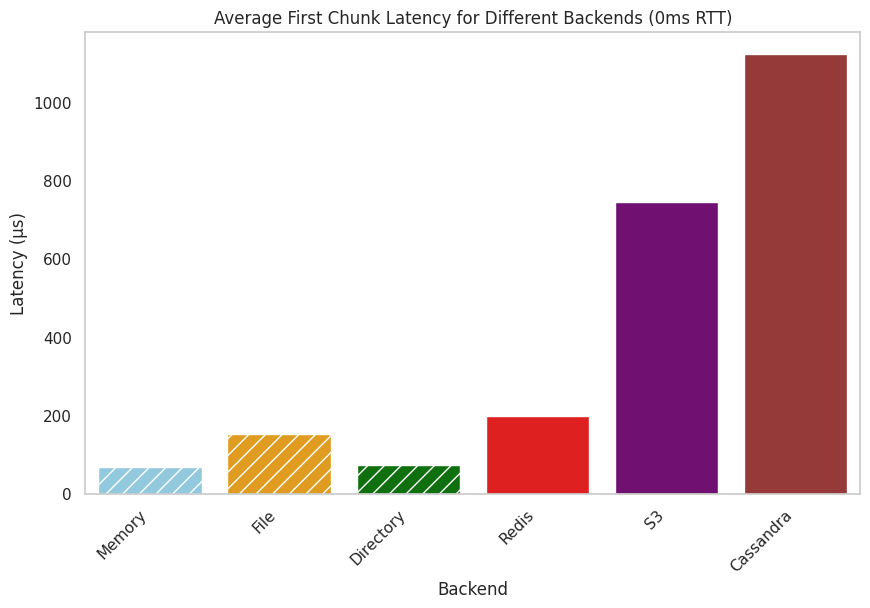

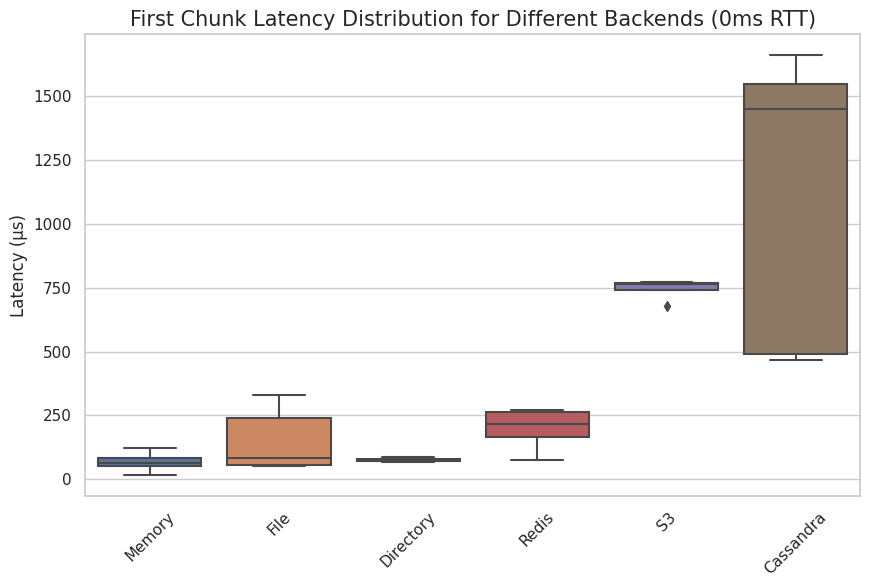

In [9]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
data = pd.read_csv('../bench/latency-first-chunk-backendvar/results.csv')

# Calculating the average latency for each backend
average_latencies = data.mean()

# Shortening the backend names by removing the common prefix and suffix
shortened_backend_names = [name.replace("First Chunk Latency for ", "").replace(" (0ms RTT) (ns)", "") for name in average_latencies.index]
average_latencies.index = shortened_backend_names

# Further shortening the backend names by removing the word "Backend"
shortened_backend_names = [name.replace(" Backend", "") for name in average_latencies.index]
average_latencies.index = shortened_backend_names

# Convert latencies from ns to µs by dividing by 1000
average_latencies = average_latencies / 1000

# Convert pandas series to dataframe for better seaborn compatibility
average_latencies_df = average_latencies.reset_index()
average_latencies_df.columns = ['Backend', 'Latency']

# Defining a list of colors for the bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']

# Define hatch patterns for 'File', 'Memory', 'Cassandra' backends
hatches = ['' if backend not in ['File', 'Memory', 'Directory'] else '//' for backend in average_latencies_df['Backend']]

# Visualizing the average latencies with further shortened backend names and different colors for each bar
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Backend', y='Latency', data=average_latencies_df, palette=colors)

# Apply hatches to bars
for i,thisbar in enumerate(bar_plot.patches):
    thisbar.set_hatch(hatches[i])

plt.title('Average First Chunk Latency for Different Backends (0ms RTT)')
plt.ylabel('Latency (µs)')
plt.xlabel('Backend')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()

# Convert entire dataframe from ns to µs by dividing by 1000
data = data / 1000

# Rename the columns to only include the backend names
data.columns = [col.split(' for ')[1].split(' (')[0].replace(' Backend', '') for col in data.columns]

# Set the theme
sns.set_theme(style="whitegrid")

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(data=data)

# Set the labels for the x-axis
ax.set_xticklabels(data.columns, rotation=45)

# Set the title
ax.set_title('First Chunk Latency Distribution for Different Backends (0ms RTT)', fontsize=15)

# Set the label for the y-axis
ax.set_ylabel('Latency (µs)', fontsize=12)

plt.show()